In [1]:
## pycistarget terminal version

import warnings
warnings.simplefilter(action = 'ignore')
import pycisTopic
pycisTopic.__version__
import numpy as np
import pandas as pd

projDir = '/media/ggj/FYT/CH/CH-cross/Fig3/Scenicplus/ew/'
outDir = projDir + 'output/'
import os
if not os.path.exists(outDir):
    os.makedirs(outDir)
tmpDir = '/media/ggj/FYT/CH/tmp/'
if not os.path.exists(tmpDir):
    os.makedirs(tmpDir)

In [2]:
## ray init
import ray
ray.init('auto')
#ray.init(address='10.105.100.3:6379')
#assert ray.is_initialized() ==True

2023-04-23 23:39:51,192	INFO worker.py:1364 -- Connecting to existing Ray cluster at address: 210.32.150.99:6379...
2023-04-23 23:39:51,202	INFO worker.py:1544 -- Connected to Ray cluster. View the dashboard at http://127.0.0.1:8265 


Python version:,3.8.13
Ray version:,2.3.0
Dashboard:,http://127.0.0.1:8265


In [3]:
#
from scenicplus.scenicplus_class import SCENICPLUS, create_SCENICPLUS_object
from scenicplus.preprocessing.filtering import *

# load data
import pickle
infile = open('/media/ggj/FYT/CH/CH-cross/Fig3/Scenicplus/ew/output/ew_cluster_cistopicObject.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()

import pickle
infile = open('/media/ggj/FYT/CH/CH-cross/Fig3/Scenicplus/ew/output/DARs/Imputed_accessibility.pkl', 'rb')
imputed_acc_obj = pickle.load(infile)
infile.close()

infile = open('/media/ggj/FYT/CH/CH-cross/Fig3/Scenicplus/ew/output/pycisTarget/menr.pkl', 'rb') # change here

menr = pickle.load(infile)
infile.close()

In [4]:
## RNA 
from loomxpy.loomxpy import SCopeLoom
from pycisTopic.loom import *
import itertools
import anndata
import scanpy as sc
import numpy as np
rna_anndata = sc.read_loom('/media/ggj/FYT/CH/CH-cross/Fig3/Scenicplus/ew/ew_rna_lineage_pseudo_20.loom')
rna_anndata


## Create Scenicplus object.
scplus_obj = create_SCENICPLUS_object(GEX_anndata = rna_anndata, 
                                     cisTopic_obj = cistopic_obj,
                                     imputed_acc_obj = imputed_acc_obj,
                                     menr = menr,
                                     multi_ome_mode = False,
                                     key_to_group_by = 'lineage',
                                     nr_cells_per_metacells =  5)

2023-04-23 23:40:13,486 create scenicplus object INFO     Following annotations were found in both assays under key lineage:
	Epithelial, Coelomocyte, Muscle, Germ, Other, Neuron, Gut.
Keeping 1499 cells for RNA and 28256 for ATAC.
2023-04-23 23:44:34,107 create scenicplus object INFO     Automatically set `nr_metacells` to: Coelomocyte: 142, Epithelial: 8, Germ: 68, Gut: 178, Muscle: 138, Neuron: 28, Other: 36
2023-04-23 23:44:34,110 create scenicplus object INFO     Generating pseudo multi-ome data


In [5]:
saveDir = outDir + 'scenicplus/'
if not os.path.exists(saveDir):
    os.mkdir(saveDir)

In [6]:
import scenicplus

In [7]:
from scenicplus import *

In [8]:
from scenicplus.wrappers.run_scenicplus import run_scenicplus

In [10]:
annot=pd.read_csv('./ew_geneanno.csv')

In [11]:
annot

,Chromosome,Start,End,Strand,Gene,Transcription_Start_Site,Transcript_type
0,GWHACBE00000001,100014784,100057509,+,evm.TU.Chr01.2352,100014784,protein_coding
1,GWHACBE00000001,10003218,10008087,-,evm.TU.Chr01.275,10003218,protein_coding
2,GWHACBE00000001,100069156,100107404,-,evm.TU.Chr01.2353,100069156,protein_coding
3,GWHACBE00000001,100115591,100156821,+,evm.TU.Chr01.2354,100115591,protein_coding
4,GWHACBE00000001,100158596,100159410,-,evm.TU.Chr01.2355,100158596,protein_coding
...,...,...,...,...,...,...,...
28357,GWHACBE00000011,9823243,9834012,-,evm.TU.Chr11.342,9823243,protein_coding
28358,GWHACBE00000011,9842612,9858429,-,evm.TU.Chr11.343,9842612,protein_coding
28359,GWHACBE00000011,9887213,9972178,+,evm.TU.Chr11.344,9887213,protein_coding
28360,GWHACBE00000011,9979302,9991566,+,evm.TU.Chr11.345,9979302,protein_coding


In [12]:
import pyranges as pr
annot_use = pr.PyRanges(annot.dropna(axis=0))

In [13]:
chromsizes=pd.read_table('./chrom.sizes',header=None)

In [14]:
chromsizes.columns = ['Chromosome', 'End']
chromsizes['Start'] = [0]*chromsizes.shape[0]
chromsizes = chromsizes.loc[:, ['Chromosome', 'Start', 'End']]
chromsizes

,Chromosome,Start,End
0,GWHACBE00000001,0,159027471
1,GWHACBE00000002,0,139115577
2,GWHACBE00000003,0,138077151
3,GWHACBE00000004,0,123808561
4,GWHACBE00000005,0,111976267
...,...,...,...
3628,GWHACBE00003629,0,394682
3629,GWHACBE00003630,0,262782
3630,GWHACBE00003631,0,231679
3631,GWHACBE00003632,0,223122


In [15]:
chromsizes = pr.PyRanges(chromsizes)

In [17]:
from scenicplus.cistromes import *

In [18]:
try:
    sys.stderr = open(os.devnull, "w")  # silence stderr
    run_scenicplus(
        scplus_obj = scplus_obj,
        variable = ['lineage'],
        species = 'ew',
        ensembl_assembly=None,ucsc_assembly=None,
        pr_annot=annot_use,pr_chromsizes=chromsizes,
        tf_file = '/media/ggj/Guo-4T-AI/Scenicplus_database/allTFs_ew.txt',
        save_path = saveDir,
        biomart_host = 'http://nov2020.archive.ensembl.org/',
        upstream = [1000, 150000],
        downstream = [1000, 150000],
        calculate_TF_eGRN_correlation = False,
        calculate_DEGs_DARs = True,
        export_to_loom_file = False,
        export_to_UCSC_file = False,
        n_cpu = 10,ignore_reinit_error=True,
        _temp_dir = os.path.join(tmpDir, 'ray_spill'))
    sys.stderr = sys.__stderr__  # unsilence stderr
except Exception as e:
    #in case of failure, still save the object
    with open(saveDir + 'scplus_obj_pseudo_20', 'wb') as f:
        pickle.dump(scplus_obj, f)
    raise(e)

2023-04-23 23:45:01,198 SCENIC+_wrapper INFO     /media/ggj/FYT/CH/CH-cross/Fig3/Scenicplus/ew/output/scenicplus/ folder already exists.
2023-04-23 23:45:01,199 SCENIC+_wrapper INFO     Merging cistromes
2023-04-23 23:45:05,830 SCENIC+_wrapper INFO     Getting search space
2023-04-23 23:45:06,438 R2G          INFO     Extending promoter annotation to 10 bp upstream and 10 downstream
2023-04-23 23:45:06,570 R2G          INFO     Extending search space to:
            						150000 bp downstream of the end of the gene.
            						150000 bp upstream of the start of the gene.
2023-04-23 23:45:07,432 R2G          INFO     Intersecting with regions.
2023-04-23 23:45:08,522 R2G          INFO     Calculating distances from region to gene
2023-04-23 23:47:16,635 R2G          INFO     Imploding multiple entries per region and gene
2023-04-23 23:51:45,855 R2G          INFO     Done!
2023-04-23 23:51:46,355 SCENIC+_wrapper INFO     Inferring region to gene relationships
2023-04-23 23:51:46,5

2023-04-23 23:53:07,395	INFO worker.py:1382 -- Calling ray.init() again after it has already been called.


2023-04-23 23:53:41,672 GSEA         INFO     Subsetting TF2G adjacencies for TF with motif.


2023-04-23 23:53:45,372	INFO worker.py:1544 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8266 


2023-04-23 23:53:46,261 GSEA         INFO     Running GSEA...
2023-04-23 23:54:01,987 GSEA         INFO     Subsetting on adjusted pvalue: 1, minimal NES: 0 and minimal leading edge genes 10
2023-04-23 23:54:02,011 GSEA         INFO     Merging eRegulons
2023-04-23 23:54:02,014 GSEA         INFO     Storing eRegulons in .uns[eRegulons].
2023-04-23 23:54:02,067 SCENIC+_wrapper INFO     Formatting eGRNs
2023-04-23 23:54:02,224 SCENIC+_wrapper INFO     Converting eGRNs to signatures
2023-04-23 23:54:02,241 SCENIC+_wrapper INFO     Calculating eGRNs AUC
2023-04-23 23:54:02,242 SCENIC+_wrapper INFO     Calculating region ranking
2023-04-23 23:54:28,088 SCENIC+_wrapper INFO     Calculating eGRNs region based AUC
2023-04-23 23:54:35,871 SCENIC+_wrapper INFO     Calculating gene ranking
2023-04-23 23:54:35,932 SCENIC+_wrapper INFO     Calculating eGRNs gene based AUC
2023-04-23 23:54:40,915 SCENIC+_wrapper INFO     Binarizing eGRNs AUC
2023-04-23 23:54:49,552 SCENIC+_wrapper INFO     Making eG

... storing 'lineage' as categorical


2023-04-23 23:55:00,845 SCENIC+      INFO     Finished calculating DEGs for variable lineage
2023-04-23 23:55:00,847 SCENIC+      INFO     Calculating DARs for variable lineage
2023-04-23 23:55:15,639 SCENIC+      INFO     There are 74948 variable features


... storing 'lineage' as categorical


2023-04-23 23:55:24,599 SCENIC+      INFO     Finished calculating DARs for variable lineage
2023-04-23 23:55:24,603 SCENIC+_wrapper INFO     Saving object
2023-04-23 23:58:04,950 SCENIC+_wrapper INFO     Finished! Took 13.062536029020945 minutes


# Downstream analysis

In [1]:
## pycistarget terminal version

import warnings
warnings.simplefilter(action = 'ignore')
import pycisTopic
pycisTopic.__version__
import numpy as np
import pandas as pd

projDir = '/media/ggj/FYT/CH/CH-cross/Fig3/Scenicplus/dr11/'
outDir = projDir + 'output/'
import os
if not os.path.exists(outDir):
    os.makedirs(outDir)
tmpDir = '/media/ggj/FYT/CH/tmp/'
if not os.path.exists(tmpDir):
    os.makedirs(tmpDir)

In [2]:
## ray init
import ray
ray.init('auto')
#ray.init(address='10.105.100.3:6379')
#assert ray.is_initialized() ==True

2023-04-12 03:48:34,112	INFO worker.py:1364 -- Connecting to existing Ray cluster at address: 210.32.153.239:6379...
2023-04-12 03:48:34,162	INFO worker.py:1544 -- Connected to Ray cluster. View the dashboard at http://127.0.0.1:8265 


Python version:,3.8.13
Ray version:,2.3.0
Dashboard:,http://127.0.0.1:8265


In [3]:
saveDir = outDir + 'scenicplus/'
if not os.path.exists(saveDir):
    os.mkdir(saveDir)

In [4]:
# Downstream analysis
import pickle
infile = open(saveDir + 'scplus_obj.pkl', 'rb')
scplus_obj = pickle.load(infile)
infile.close()

In [19]:
from scenicplus.preprocessing.filtering import apply_std_filtering_to_eRegulons
apply_std_filtering_to_eRegulons(scplus_obj)
scplus_obj.uns['eRegulon_metadata_filtered'].head()

Only keeping positive R2G
Only keep extended if not direct
Getting signatures...
Simplifying eRegulons ...


,Region_signature_name,Gene_signature_name,TF,is_extended,Region,Gene,R2G_importance,R2G_rho,R2G_importance_x_rho,R2G_importance_x_abs_rho,TF2G_importance,TF2G_regulation,TF2G_rho,TF2G_importance_x_abs_rho,TF2G_importance_x_rho,Consensus_name
0,evm.TU.Chr01.1121_+_(21r),evm.TU.Chr01.1121_+_(14g),evm.TU.Chr01.1121,False,GWHACBE00000003:38934914-38935414,evm.TU.Chr03.1120,0.031361,0.289375,0.009075,0.009075,3.786115,1,0.286742,1.085639,1.085639,evm.TU.Chr01.1121_+_+
1,evm.TU.Chr01.1121_+_(21r),evm.TU.Chr01.1121_+_(14g),evm.TU.Chr01.1121,False,GWHACBE00000004:53260701-53261201,evm.TU.Chr04.1383,0.010180,0.117312,0.001194,0.001194,4.405120,1,0.167210,0.736582,0.736582,evm.TU.Chr01.1121_+_+
2,evm.TU.Chr01.1121_+_(21r),evm.TU.Chr01.1121_+_(14g),evm.TU.Chr01.1121,False,GWHACBE00000004:53258114-53258614,evm.TU.Chr04.1383,0.003025,0.148286,0.000449,0.000449,4.405120,1,0.167210,0.736582,0.736582,evm.TU.Chr01.1121_+_+
3,evm.TU.Chr01.1121_+_(21r),evm.TU.Chr01.1121_+_(14g),evm.TU.Chr01.1121,False,GWHACBE00000011:29292371-29292871,evm.TU.Chr11.922,0.063711,0.531915,0.033889,0.033889,3.595898,1,0.346330,1.245368,1.245368,evm.TU.Chr01.1121_+_+
4,evm.TU.Chr01.1121_+_(21r),evm.TU.Chr01.1121_+_(14g),evm.TU.Chr01.1121,False,GWHACBE00000011:29166738-29167238,evm.TU.Chr11.922,0.009988,0.230335,0.002300,0.002300,3.595898,1,0.346330,1.245368,1.245368,evm.TU.Chr01.1121_+_+


In [20]:
scplus_obj.uns['eRegulon_metadata_filtered']

,Region_signature_name,Gene_signature_name,TF,is_extended,Region,Gene,R2G_importance,R2G_rho,R2G_importance_x_rho,R2G_importance_x_abs_rho,TF2G_importance,TF2G_regulation,TF2G_rho,TF2G_importance_x_abs_rho,TF2G_importance_x_rho,Consensus_name
0,evm.TU.Chr01.1121_+_(21r),evm.TU.Chr01.1121_+_(14g),evm.TU.Chr01.1121,False,GWHACBE00000003:38934914-38935414,evm.TU.Chr03.1120,0.031361,0.289375,0.009075,0.009075,3.786115,1,0.286742,1.085639,1.085639,evm.TU.Chr01.1121_+_+
1,evm.TU.Chr01.1121_+_(21r),evm.TU.Chr01.1121_+_(14g),evm.TU.Chr01.1121,False,GWHACBE00000004:53260701-53261201,evm.TU.Chr04.1383,0.010180,0.117312,0.001194,0.001194,4.405120,1,0.167210,0.736582,0.736582,evm.TU.Chr01.1121_+_+
2,evm.TU.Chr01.1121_+_(21r),evm.TU.Chr01.1121_+_(14g),evm.TU.Chr01.1121,False,GWHACBE00000004:53258114-53258614,evm.TU.Chr04.1383,0.003025,0.148286,0.000449,0.000449,4.405120,1,0.167210,0.736582,0.736582,evm.TU.Chr01.1121_+_+
3,evm.TU.Chr01.1121_+_(21r),evm.TU.Chr01.1121_+_(14g),evm.TU.Chr01.1121,False,GWHACBE00000011:29292371-29292871,evm.TU.Chr11.922,0.063711,0.531915,0.033889,0.033889,3.595898,1,0.346330,1.245368,1.245368,evm.TU.Chr01.1121_+_+
4,evm.TU.Chr01.1121_+_(21r),evm.TU.Chr01.1121_+_(14g),evm.TU.Chr01.1121,False,GWHACBE00000011:29166738-29167238,evm.TU.Chr11.922,0.009988,0.230335,0.002300,0.002300,3.595898,1,0.346330,1.245368,1.245368,evm.TU.Chr01.1121_+_+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,evm.TU.ctg4075.3_+_(27r),evm.TU.ctg4075.3_+_(18g),evm.TU.ctg4075.3,False,GWHACBE00000001:41499346-41499846,evm.TU.Chr01.1121,0.014916,0.237474,0.003542,0.003542,1.456896,1,0.282375,0.411391,0.411391,evm.TU.ctg4075.3_+_+
23,evm.TU.ctg4075.3_+_(27r),evm.TU.ctg4075.3_+_(18g),evm.TU.ctg4075.3,False,GWHACBE00000003:8068207-8068707,evm.TU.Chr03.231,0.011741,0.061827,0.000726,0.000726,2.163539,1,0.055916,0.120976,0.120976,evm.TU.ctg4075.3_+_+
24,evm.TU.ctg4075.3_+_(27r),evm.TU.ctg4075.3_+_(18g),evm.TU.ctg4075.3,False,GWHACBE00000005:52451598-52452098,evm.TU.Chr05.1262,0.020691,0.306091,0.006333,0.006333,3.927380,1,0.277623,1.090329,1.090329,evm.TU.ctg4075.3_+_+
25,evm.TU.ctg4075.3_+_(27r),evm.TU.ctg4075.3_+_(18g),evm.TU.ctg4075.3,False,GWHACBE00000002:20864425-20864925,evm.TU.Chr02.500,0.016316,0.092854,0.001515,0.001515,1.966418,1,0.216728,0.426177,0.426177,evm.TU.ctg4075.3_+_+


In [6]:
scplus_obj.uns['eRegulon_metadata_filtered'].to_csv(saveDir + 'eRegulon_metadata_filtered.csv')
scplus_obj.uns['eRegulon_metadata'].to_csv(saveDir + 'eRegulon_metadata.csv')

In [21]:
import dill
from scenicplus.eregulon_enrichment import score_eRegulons
region_ranking = dill.load(open(os.path.join(saveDir,  'region_ranking.pkl'), 'rb')) #load ranking calculated using the wrapper function
gene_ranking = dill.load(open(os.path.join(saveDir, 'gene_ranking.pkl'), 'rb')) #load ranking calculated using the wrapper function

In [22]:
#auc
score_eRegulons(scplus_obj,
                ranking = region_ranking,
                eRegulon_signatures_key = 'eRegulon_signatures_filtered',
                key_added = 'eRegulon_AUC_filtered',
                enrichment_type= 'region',
                auc_threshold = 0.1,
                normalize = False,
                n_cpu = 5)
score_eRegulons(scplus_obj,
                gene_ranking,
                eRegulon_signatures_key = 'eRegulon_signatures_filtered',
                key_added = 'eRegulon_AUC_filtered',
                enrichment_type = 'gene',
                auc_threshold = 0.1,
                normalize= False,
                n_cpu = 5)

In [24]:
from scenicplus.cistromes import TF_cistrome_correlation, generate_pseudobulks
TF_cistrome_correlation(
            scplus_obj,
            use_pseudobulk = False,
            variable = 'lineage',
            auc_key = 'eRegulon_AUC_filtered',
            signature_key = 'Gene_based',
            out_key = 'filtered_gene_based')
TF_cistrome_correlation(
            scplus_obj,
            use_pseudobulk = False,
            variable = 'lineage',
            auc_key = 'eRegulon_AUC_filtered',
            signature_key = 'Region_based',
            out_key = 'filtered_region_based')

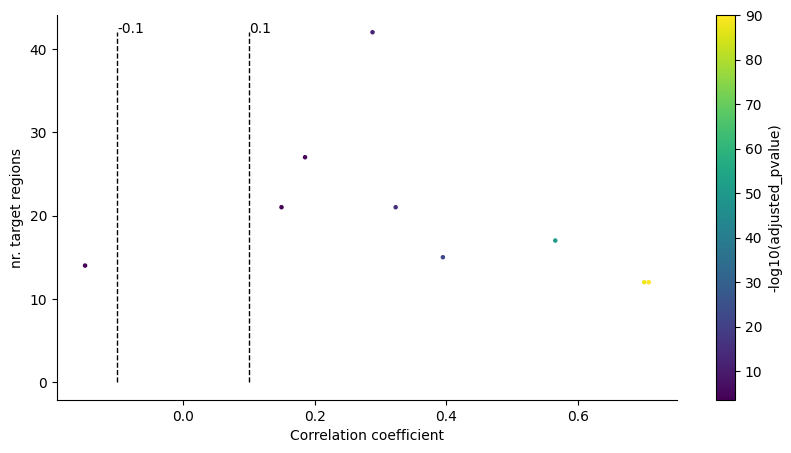

In [25]:
import numpy as np
n_targets = [int(x.split('(')[1].replace('r)', '')) for x in scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Cistrome']]
rho = scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Rho'].to_list()
adj_pval = scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Adjusted_p-value'].to_list()

thresholds = {
        'rho': [-0.1, 0.1],
        'n_targets': 0
}
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (10, 5))
sc = ax.scatter(rho, n_targets, c = -np.log10(adj_pval), s = 5)
ax.set_xlabel('Correlation coefficient')
ax.set_ylabel('nr. target regions')
#ax.hlines(y = thresholds['n_targets'], xmin = min(rho), xmax = max(rho), color = 'black', ls = 'dashed', lw = 1)
ax.vlines(x = thresholds['rho'], ymin = 0, ymax = max(n_targets), color = 'black', ls = 'dashed', lw = 1)
ax.text(x = thresholds['rho'][0], y = max(n_targets), s = str(thresholds['rho'][0]))
ax.text(x = thresholds['rho'][1], y = max(n_targets), s = str(thresholds['rho'][1]))
sns.despine(ax = ax)
fig.colorbar(sc, label = '-log10(adjusted_pvalue)', ax = ax)
plt.show()

In [26]:
selected_cistromes = scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based'].loc[
        np.logical_or(
                scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Rho'] > thresholds['rho'][1],
                scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Rho'] < thresholds['rho'][0]
        )]['Cistrome'].to_list()
selected_eRegulons = [x.split('_(')[0] for x in selected_cistromes]
selected_eRegulons_gene_sig = [
        x for x in scplus_obj.uns['eRegulon_signatures_filtered']['Gene_based'].keys()
        if x.split('_(')[0] in selected_eRegulons]
selected_eRegulons_region_sig = [
        x for x in scplus_obj.uns['eRegulon_signatures_filtered']['Region_based'].keys()
        if x.split('_(')[0] in selected_eRegulons]
#save the results in the scenicplus object
scplus_obj.uns['selected_eRegulon'] = {'Gene_based': selected_eRegulons_gene_sig, 'Region_based': selected_eRegulons_region_sig}
print(f'selected: {len(selected_eRegulons_gene_sig)} eRegulons')

selected: 9 eRegulons


In [27]:
from scenicplus.plotting.dotplot import generate_dotplot_df
plotting_df = generate_dotplot_df(
        scplus_obj = scplus_obj,
        size_matrix = scplus_obj.uns['eRegulon_AUC_filtered']['Region_based'],
        color_matrix = scplus_obj.to_df('EXP'),
        scale_size_matrix = True,
        scale_color_matrix = True,
        group_variable = 'lineage',
        subset_eRegulons = scplus_obj.uns['selected_eRegulon']['Gene_based'])
tmp = plotting_df[['index', 'eRegulon_name', 'color_val']
        ].pivot_table(index = 'index', columns = 'eRegulon_name'
        ).fillna(0)['color_val']
tmp
idx_max = tmp.idxmax(axis = 0)
order = pd.concat([idx_max[idx_max == x] for x in tmp.index.tolist() if len(plotting_df[plotting_df == x]) > 0]).index.tolist()
plotting_df['eRegulon_name'] = pd.Categorical(plotting_df['eRegulon_name'], categories = order)
plotting_df['repressor_activator'] = ['activator' if '+' in n.split('_')[1] and 'extended' not in n or '+' in n.split('_')[2] and 'extended' in n  else 'repressor' for n in plotting_df['eRegulon_name']]
plotting_df.to_csv('./ew_tfdf_pseudo_20_total_new.csv')

In [23]:
from scenicplus.plotting.dotplot import generate_dotplot_df
plotting_df = generate_dotplot_df(
        scplus_obj = scplus_obj,
        size_matrix = scplus_obj.uns['eRegulon_AUC_filtered']['Region_based'],
        color_matrix = scplus_obj.to_df('EXP'),
        scale_size_matrix = True,
        scale_color_matrix = True,
        group_variable = 'lineage',
        subset_eRegulons = scplus_obj.uns['selected_eRegulon']['Gene_based'])
tmp = plotting_df[['index', 'eRegulon_name', 'color_val']
        ].pivot_table(index = 'index', columns = 'eRegulon_name'
        ).fillna(0)['color_val']
tmp
idx_max = tmp.idxmax(axis = 0)
order = pd.concat([idx_max[idx_max == x] for x in tmp.index.tolist() if len(plotting_df[plotting_df == x]) > 0]).index.tolist()
plotting_df['eRegulon_name'] = pd.Categorical(plotting_df['eRegulon_name'], categories = order)
plotting_df['repressor_activator'] = ['activator' if '+' in n.split('_')[1] and 'extended' not in n or '+' in n.split('_')[2] and 'extended' in n  else 'repressor' for n in plotting_df['eRegulon_name']]
plotting_df.to_csv('./zebrafish_tfdf_pseudo_20_total.csv')

In [24]:
import dill
dill.dump(scplus_obj, open(os.path.join(saveDir, 'scplus_obj_total.pkl'), 'wb'), protocol=-1)